# 🏠 Hands-On Regression: California Housing Dataset
## A Complete End-to-End Machine Learning Project

**Welcome to Lecture 2** of *Practical Introduction to Machine Learning and Deep Learning*!

In Lecture 1, we built Linear Regression **from scratch** and understood:
- Pattern recognition & function approximation
- Gradient descent optimization
- Loss functions and training loops

Now, we take it to the **next level** with a **real-world dataset** and industry-standard practices.

## 🎯 What You'll Learn

1. **Compare our implementation with sklearn** (validation & benchmarking)
2. **Data Exploration & Visualization** (EDA)
3. **Data Preprocessing & Feature Engineering**
4. **Multiple Regression Models** (Linear, Ridge, Lasso, Polynomial)
5. **Model Evaluation & Comparison**
6. **Building a Simple Prediction UI**

Let's dive in! 🚀

---
# Part 1️⃣: Validation — Our Implementation vs Sklearn

Before working on real data, let's **validate** that our custom `LinearRegression` class works correctly by comparing it with `sklearn`.

## 🧪 Why This Matters
- Confirms our gradient descent implementation is correct
- Builds confidence in our understanding
- Shows that ML libraries are doing the same math we learned!

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Import our custom implementation from Lecture 1
class LinearRegression:
    """Custom Linear Regression using Gradient Descent"""
    
    def __init__(self, n_features, lr=1e-7):
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = np.array([[0.0]])
        self.lr = lr
        self.losses = []
        self.W_history = []
        self.b_history = []

    def forward(self, X):
        return X @ self.W + self.b

    def compute_loss(self, Y_pred, Y_true):
        return np.mean((Y_true - Y_pred) ** 2)

    def backward(self, X, Y_pred, Y_true):
        dW = (2 / len(X)) * (X.T @ (Y_pred - Y_true))
        db = (2 / len(X)) * np.sum(Y_pred - Y_true)
        return dW, db

    def step(self, dW, db):
        self.W -= self.lr * dW
        self.b -= self.lr * db

    def fit(self, X, Y, epochs=300, verbose=False):
        for i in range(epochs):
            Y_pred = self.forward(X)
            loss = self.compute_loss(Y_pred, Y)
            self.losses.append(loss)
            self.W_history.append(self.W.copy())
            self.b_history.append(self.b.copy())

            dW, db = self.backward(X, Y_pred, Y)
            self.step(dW, db)

            if verbose and i % 100 == 0:
                print(f"Epoch {i} | Loss: {loss:.4f}")
    
    def predict(self, X):
        return self.forward(X)

# 🧰 Introduction to Scikit-Learn (sklearn)

[Scikit-Learn](https://scikit-learn.org/stable/) is one of the most popular and widely used **machine learning libraries in Python**.  
It provides:
- Efficient implementations of ML algorithms
- Tools for preprocessing, model evaluation, and pipelines
- Easy integration with NumPy, Pandas, and Matplotlib

In this lecture, we’ll use `sklearn` to:
- Validate our custom Linear Regression model 🧪
- Train **Linear**, **Ridge**, **Lasso**, and **Polynomial** regressions
- Evaluate and compare different models

👉 Official Documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)


In [8]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [9]:
# Generate synthetic data for validation
np.random.seed(42)
n_samples = 1000
n_features = 5

X_train = np.random.randn(n_samples, n_features)
true_weights = np.array([[2.5], [-1.3], [0.8], [3.2], [-0.5]])
true_bias = 5.0
noise = np.random.randn(n_samples, 1) * 0.5

y_train = X_train @ true_weights + true_bias + noise

print("📊 Training Data Shape:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"\n🎯 True Parameters:")
print(f"Weights: {true_weights.flatten()}")
print(f"Bias: {true_bias}")

📊 Training Data Shape:
X_train: (1000, 5)
y_train: (1000, 1)

🎯 True Parameters:
Weights: [ 2.5 -1.3  0.8  3.2 -0.5]
Bias: 5.0


## 🔬 Training Both Models

In [10]:
# 1️⃣ Train our custom model
print("=" * 60)
print("🔧 Training Custom Linear Regression...")
print("=" * 60)
start_time = time.time()

custom_model = LinearRegression(n_features=n_features, lr=0.01)
custom_model.fit(X_train, y_train, epochs=1000, verbose=True)

custom_time = time.time() - start_time
print(f"\n✅ Custom model trained in {custom_time:.4f} seconds")
print(f"Learned Weights: {custom_model.W.flatten()}")
print(f"Learned Bias: {custom_model.b[0,0]:.4f}")

🔧 Training Custom Linear Regression...
Epoch 0 | Loss: 44.1258
Epoch 100 | Loss: 1.0345
Epoch 200 | Loss: 0.2675
Epoch 300 | Loss: 0.2529
Epoch 400 | Loss: 0.2526
Epoch 500 | Loss: 0.2526
Epoch 600 | Loss: 0.2526
Epoch 700 | Loss: 0.2526
Epoch 800 | Loss: 0.2526
Epoch 900 | Loss: 0.2526

✅ Custom model trained in 0.0550 seconds
Learned Weights: [ 2.49384305 -1.28712332  0.78440285  3.20062015 -0.4797831 ]
Learned Bias: 4.9763


In [11]:
# 2️⃣ Train sklearn model
print("\n" + "=" * 60)
print("📚 Training Sklearn Linear Regression...")
print("=" * 60)
start_time = time.time()

sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train.ravel())

sklearn_time = time.time() - start_time
print(f"\n✅ Sklearn model trained in {sklearn_time:.4f} seconds")
print(f"Learned Weights: {sklearn_model.coef_}")
print(f"Learned Bias: {sklearn_model.intercept_:.4f}")


📚 Training Sklearn Linear Regression...

✅ Sklearn model trained in 0.0033 seconds
Learned Weights: [ 2.49384306 -1.28712331  0.78440284  3.20062017 -0.47978311]
Learned Bias: 4.9763


## 📊 Comparison Results

In [12]:
# Generate test data
X_test = np.random.randn(200, n_features)
y_test = X_test @ true_weights + true_bias + np.random.randn(200, 1) * 0.5

# Predictions
y_pred_custom = custom_model.predict(X_test)
y_pred_sklearn = sklearn_model.predict(X_test).reshape(-1, 1)

# Metrics
mse_custom = mean_squared_error(y_test, y_pred_custom)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_custom = r2_score(y_test, y_pred_custom)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("\n" + "=" * 60)
print("📈 MODEL COMPARISON")
print("=" * 60)
print(f"\n{'Metric':<20} {'Custom Model':<20} {'Sklearn Model':<20}")
print("-" * 60)
print(f"{'MSE':<20} {mse_custom:<20.6f} {mse_sklearn:<20.6f}")
print(f"{'R² Score':<20} {r2_custom:<20.6f} {r2_sklearn:<20.6f}")
print(f"{'Training Time (s)':<20} {custom_time:<20.6f} {sklearn_time:<20.6f}")
print("=" * 60)


📈 MODEL COMPARISON

Metric               Custom Model         Sklearn Model       
------------------------------------------------------------
MSE                  0.280305             0.280305            
R² Score             0.987760             0.987760            
Training Time (s)    0.055050             0.003281            


## 📊 Understanding the R² Metric — *Coefficient of Determination*

In addition to **RMSE** (which measures the average error size),  
**R²** tells us **how well our model explains the variance** in the target variable.

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Where:

$$
\text{SS}_{\text{res}} = \sum (y_i - \hat{y}_i)^2
$$

$$
\text{SS}_{\text{tot}} = \sum (y_i - \bar{y})^2
$$

$$
y_i \quad\text{— true value (the actual observed target for sample }i\text{)}
$$

$$
\hat{y}_i \quad\text{— predicted value (model's prediction for sample }i\text{). For linear regression: }\hat{y}_i = X_i W + b\text{.}
$$

$$
\bar{y} = \frac{1}{N}\sum_{i=1}^{N} y_i \quad\text{— mean of the true values (the baseline prediction that does not depend on the model).}
$$


### 🧠 Intuition
- \( R^2 = 1 \) → Perfect fit (model explains 100% of the variance)  
- \( R^2 = 0 \) → Model is no better than predicting the mean  
- \( R^2 < 0 \) → Model performs worse than a simple average baseline

### 🧪 Why it matters
- Provides an **interpretable score** for how much variance your model captures.  
- Useful for comparing different models on the same dataset.  
- Complements RMSE to provide both **error magnitude** and **explanatory power**.

👉 In the code below, we use:

```python
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


<details>
<summary>🧾 Whiteboard Cue (click to expand)</summary>

- Show data points and **mean** \( \bar{y} \)  
- Explain **baseline vs model predictions** \( \hat{y}_i \)  
- Draw **SS_tot** (spread around mean) and **SS_res** (error after model)  
- Intuition:
  - R² = 1 → perfect fit  
  - R² = 0 → same as mean  
  - R² < 0 → worse than mean  
- Key: R² = how much variance the model explains
</details>


## If we get it, let's move code it 

In [13]:
# R² implementation from scratch
def r2_score_custom(y_true, y_pred):
    y_true = y_true.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    y_mean = y_true.mean()

    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_mean) ** 2).sum()
    return 1 - (ss_res / ss_tot)


r2_custom = r2_score_custom(y_test, y_pred_custom)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("our code",r2_custom)
print("sklearn code",r2_sklearn)

our code 0.9877604636316719
sklearn code 0.9877604637267977


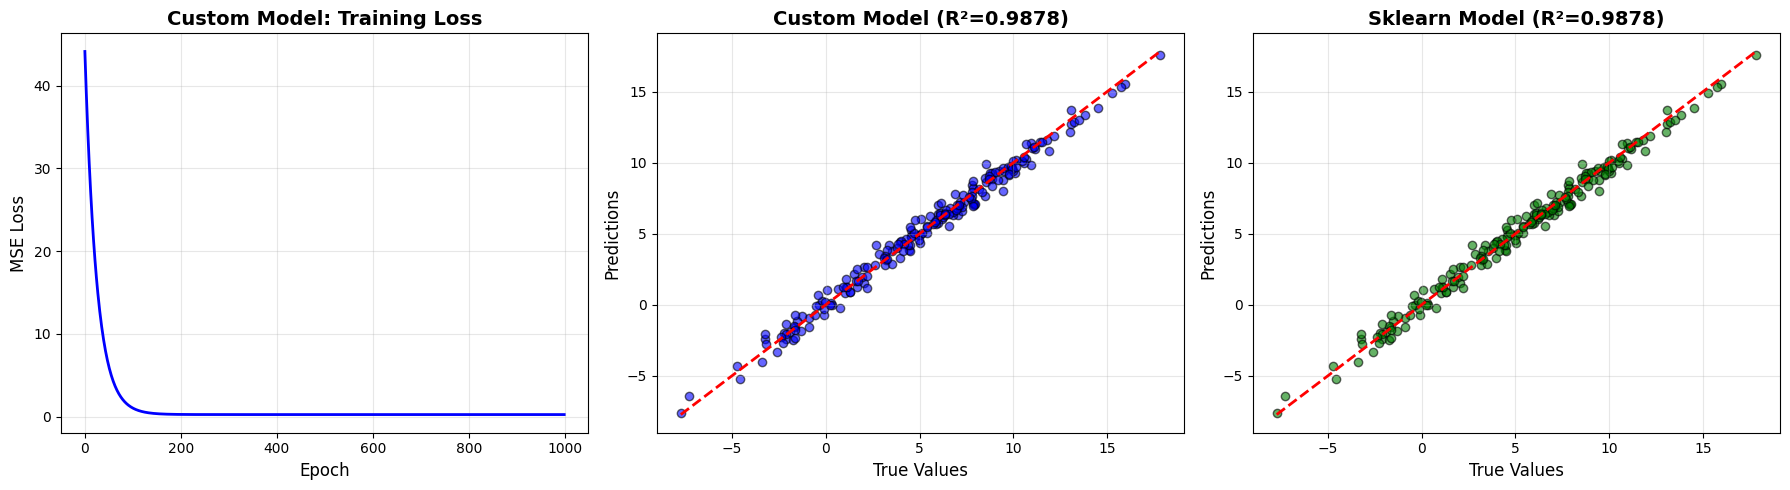

In [14]:
# Visualization: Predictions Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss curve (only for custom model)
axes[0].plot(custom_model.losses, color='blue', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('MSE Loss', fontsize=12)
axes[0].set_title('Custom Model: Training Loss', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Custom model predictions
axes[1].scatter(y_test, y_pred_custom, alpha=0.6, color='blue', edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('True Values', fontsize=12)
axes[1].set_ylabel('Predictions', fontsize=12)
axes[1].set_title(f'Custom Model (R²={r2_custom:.4f})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Sklearn predictions
axes[2].scatter(y_test, y_pred_sklearn, alpha=0.6, color='green', edgecolors='k')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('True Values', fontsize=12)
axes[2].set_ylabel('Predictions', fontsize=12)
axes[2].set_title(f'Sklearn Model (R²={r2_sklearn:.4f})', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎓 Key Takeaways

✅ **Custom Linear Regression works!**  
- Predictions and metrics match sklearn closely.

✅ **Sklearn is fast**  
- Uses the **Normal Equation**:  
$$
W = (X^T X)^{-1} X^T y
$$  
- Direct solution, no iterations needed.

✅ **Gradient Descent is powerful**  
- Our implementation uses it: iterative updates of weights  
- Slower for small problems, but **essential for complex models** (e.g., neural networks, large datasets, deep learning).

💡 **Big Picture:**  
- Normal Equation → great for small/simple linear regression  
- Gradient Descent → general, scales to **any differentiable model**

<details>
<summary>🧾 Whiteboard Cue (click to expand)</summary>
# 🚀 Universal ML Workflow 

💾 **Data** → 📊 **Preprocess** → 🛠️ **Feature Eng.** → 🤖 **Modeling** → 📈 **Evaluation** → 🚀 **Deployment** → 🎯 **Decision/Insights**

</details>


---
# Part 2️⃣: Real-World Dataset — California Housing

Now let's work with **real data**! The California Housing dataset contains information about houses in California districts (1990 census).

## 📋 Dataset Features

| Feature | Description |
|---------|-------------|
| **MedInc** | Median income in block group |
| **HouseAge** | Median house age in block group |
| **AveRooms** | Average number of rooms per household |
| **AveBedrms** | Average number of bedrooms per household |
| **Population** | Block group population |
| **AveOccup** | Average number of household members |
| **Latitude** | Block group latitude |
| **Longitude** | Block group longitude |
| **Target** | Median house value (in $100,000s) |


In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
print("📥 Loading California Housing Dataset...")
housing = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target  # Target variable

print(f"\n✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Features: {housing.feature_names}")
print(f"\nFirst 5 rows:")
df.head()

📥 Loading California Housing Dataset...

✅ Dataset loaded successfully!
Shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

# 🐼 Introduction to Pandas

[Pandas](https://pandas.pydata.org/) is the **go-to Python library for data manipulation and analysis**.  

It provides:

- Easy handling of **tabular data** with `DataFrame`s and `Series`
- Fast **data selection, filtering, and aggregation**
- Tools for **cleaning, transforming, and exploring datasets**
- Integration with **NumPy, Matplotlib, and ML libraries**

In this lecture, we use Pandas to:

1. Convert the California Housing dataset into a **DataFrame**
2. Explore the data (shape, features, sample rows)
3. Prepare it for **preprocessing and modeling**

👉 Official Documentation: [https://pandas.pydata.org/](https://pandas.pydata.org/)


## 🔍 Step 1: Exploratory Data Analysis (EDA)

Before building models, we must **understand our data**:
- Check for missing values
- Understand distributions
- Detect outliers
- Explore relationships between features

In [17]:
# Basic statistics
print("=" * 70)
print("📊 DATASET STATISTICS")
print("=" * 70)
print(df.describe())



📊 DATASET STATISTICS
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

In [18]:
# Missing values check
print("\n" + "=" * 70)
print("🔍 MISSING VALUES CHECK")
print("=" * 70)
print(df.isnull().sum())



🔍 MISSING VALUES CHECK
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


## 🔍 Why Missing Values Matter

Before training any model, it’s crucial to check for **missing values** in your dataset.

### ✅ Why this matters:
1. **Data Integrity:** Missing values can distort statistics like mean, variance, and correlations.
2. **Model Behavior:**  
   - Some models (like **Linear Regression**, **SVM**, **Logistic Regression**) **cannot handle missing values** natively — they will throw errors.  
   - Other models (like **XGBoost** or some **tree-based algorithms**) can handle missing values internally.
3. **Impact on Performance:** Even a few missing values can **bias your model** or reduce predictive performance.

### 🧪 Next Step
We will demonstrate a **practical approach using `sklearn`** to handle missing values so our models can train safely:

- Detect missing values (`isnull()`)
- Impute missing values (mean, median, or most frequent)
- Use sklearn’s `SimpleImputer` for pipeline integration

## In our dataset, there are no missing values.but we will learn how to handle them anyway.because it is a common real-world issue.and you will likely encounter it in your projects.

In [19]:
from sklearn.impute import SimpleImputer
import numpy as np

# For demonstration, let's create some artificial missing values
df_missing = df.copy()
rng = np.random.default_rng(seed=42)
missing_mask = rng.choice([True, False], size=df_missing.shape, p=[0.05, 0.95])
df_missing[df_missing.columns] = df_missing.where(~missing_mask, np.nan)

print("📌 Sample of dataset with artificial missing values:")
print(df_missing.head())

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit on data and transform
df_imputed = pd.DataFrame(imputer.fit_transform(df_missing), columns=df_missing.columns)

print("\n✅ Missing values handled:")
print(df_imputed.isnull().sum())


📌 Sample of dataset with artificial missing values:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3     NaN      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

✅ Missing values handled:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [20]:
# Data types
print("\n" + "=" * 70)
print("📋 DATA TYPES")
print("=" * 70)
print(df.dtypes)


📋 DATA TYPES
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object


## 📋 Why Checking Data Types Matters

Before building models, it’s crucial to understand the **data types** of each feature.

### ✅ Key Points:
1. **Model Compatibility:**  
   - Most ML models require **numerical input** (float or int).  
   - Categorical features must be encoded (e.g., one-hot or label encoding).

2. **Memory & Performance:**  
   - Correct data types save memory and improve computation speed.

3. **Data Cleaning & Transformation:**  
   - Knowing types helps decide preprocessing steps:
     - Scaling numerical features
     - Encoding categorical variables
     - Handling dates or strings

### 🧪 Next Step
We will demonstrate a **practical approach** to convert and prepare data types using:
- `pd.to_numeric()`, `astype()`
- `sklearn.preprocessing` tools like `OneHotEncoder` and `ColumnTransformer`
- Ensuring the dataset is **ready for modeling**

## Again, in our dataset, all features are already numeric.but in real-world datasets, you will often encounter categorical or mixed data types.and you will need to preprocess them accordingly.

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# For demonstration, let's add a fake categorical column
df_types = df.copy()
df_types['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=df_types.shape[0])

print("📌 Sample data with a categorical column:")
print(df_types.head())

# Detect categorical columns
categorical_cols = df_types.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_types.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)
    ]
)

# Transform the dataset
df_prepared = preprocessor.fit_transform(df_types)
print("\n✅ Dataset ready for modeling:")
print("Shape after encoding:", df_prepared.shape)


📌 Sample data with a categorical column:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price Region  
0    -122.23  4.526  South  
1    -122.22  3.585   West  
2    -122.24  3.521  North  
3    -122.25  3.413   East  
4    -122.25  3.422  South  

Categorical columns: ['Region']
Numeric columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Price']

✅ Dataset ready for modeling:
Shape after encoding: (20640, 12)


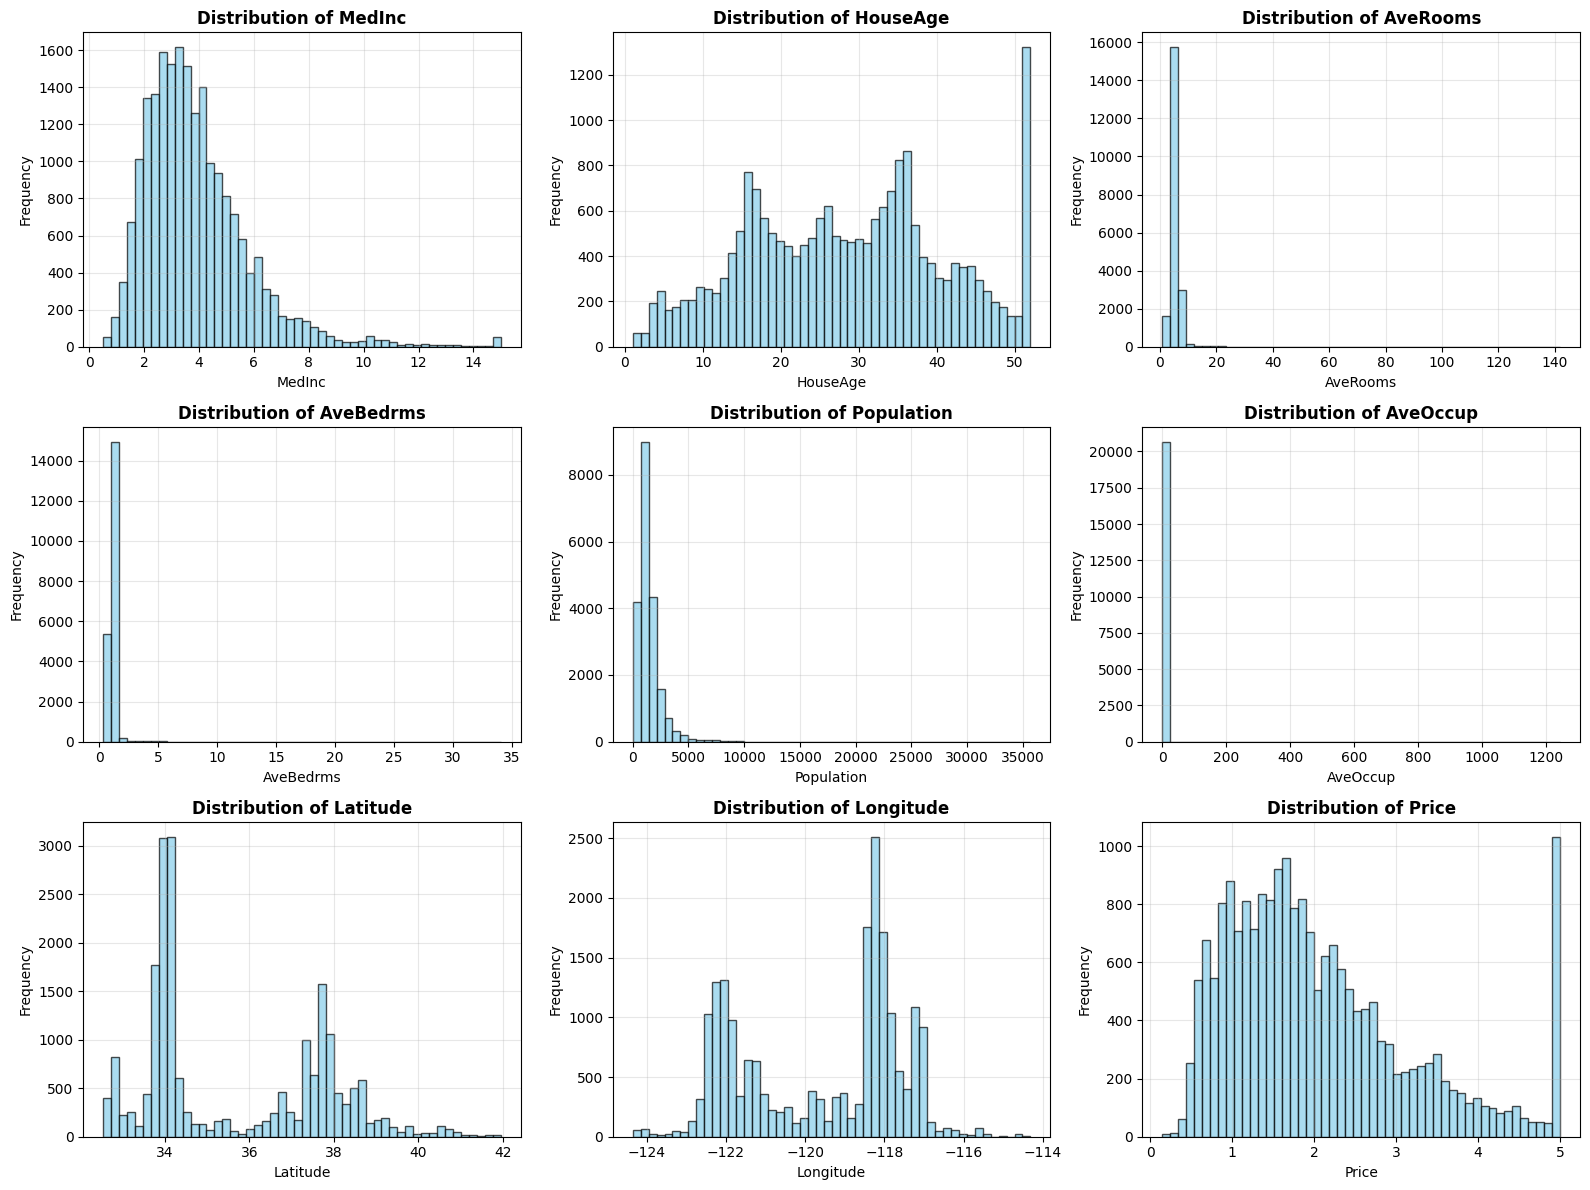

In [22]:
# Distribution visualizations
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🗺️ Geographic Visualization

Since we have **Latitude** and **Longitude**, let's visualize house prices geographically!

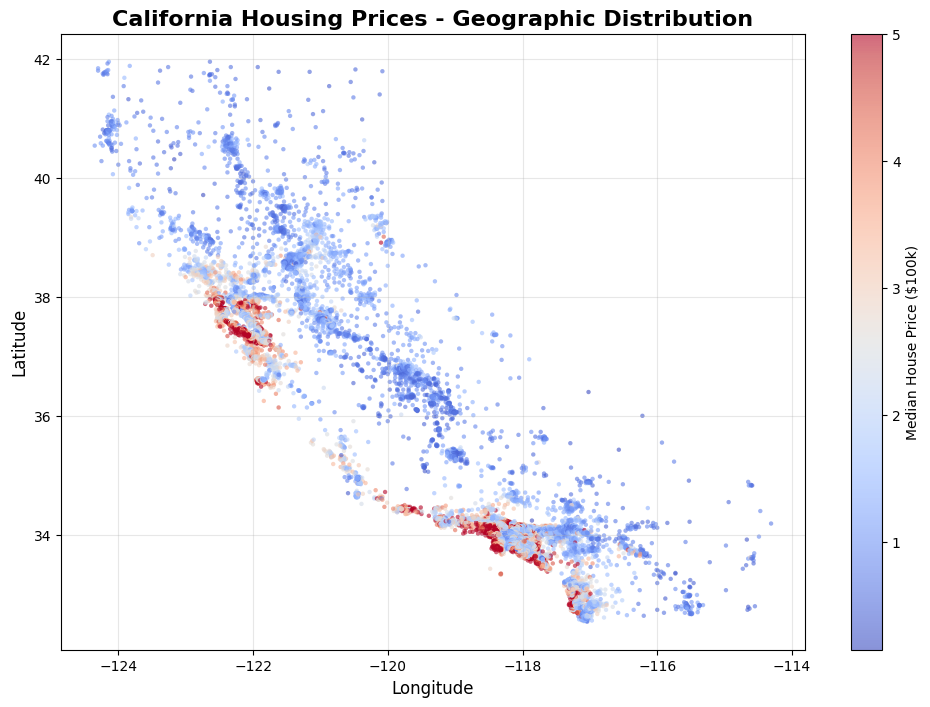

In [23]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['Price'], cmap='coolwarm', 
                     alpha=0.6, s=10, edgecolors='none')
plt.colorbar(scatter, label='Median House Price ($100k)')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('California Housing Prices - Geographic Distribution', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

## 📊 Correlation Analysis

Understanding feature correlations helps us:
- Identify the most important features
- Detect multicollinearity
- Guide feature engineering

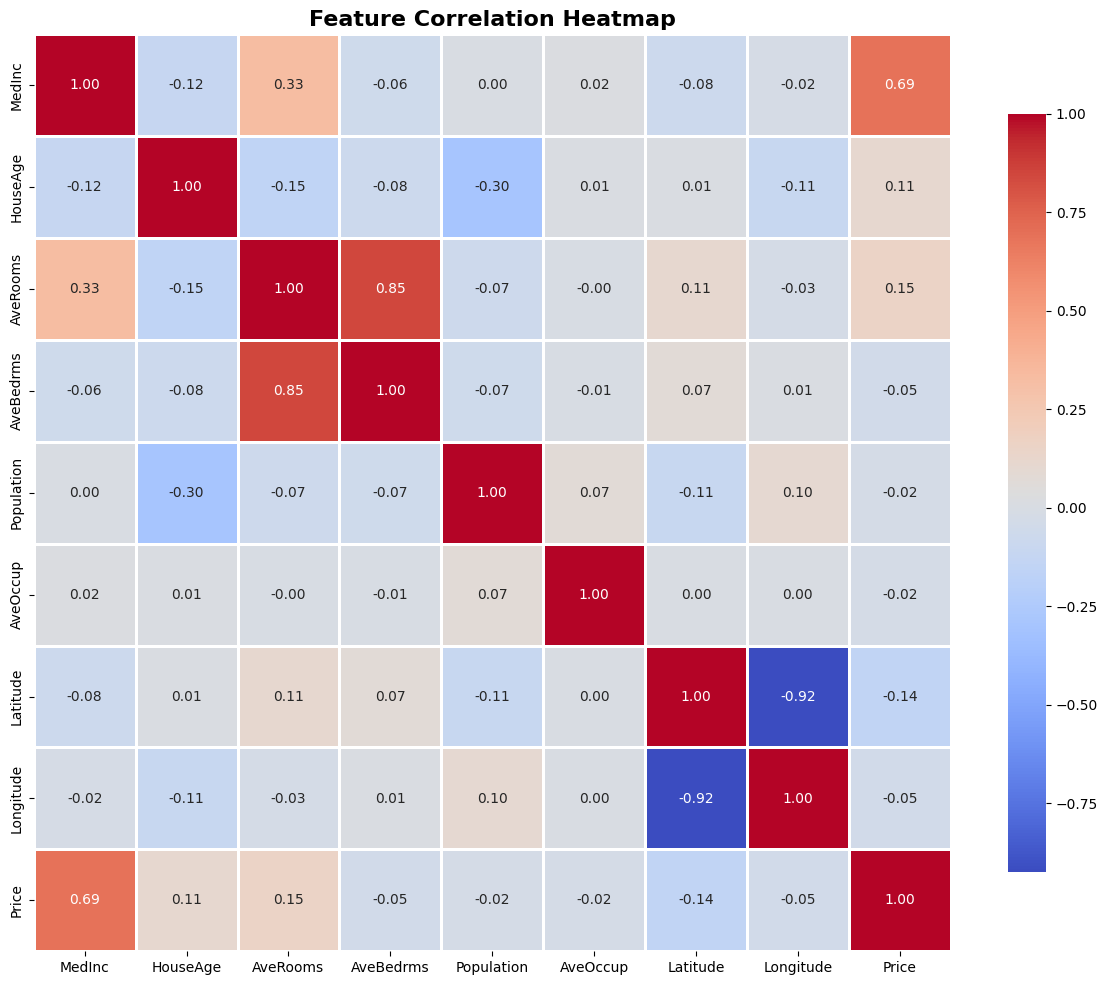


🎯 FEATURES RANKED BY CORRELATION WITH PRICE
MedInc            0.6881
AveRooms          0.1519
HouseAge          0.1056
AveOccup         -0.0237
Population       -0.0246
Longitude        -0.0460
AveBedrms        -0.0467
Latitude         -0.1442


In [24]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Feature importance ranking
print("\n" + "=" * 70)
print("🎯 FEATURES RANKED BY CORRELATION WITH PRICE")
print("=" * 70)
correlations = correlation_matrix['Price'].drop('Price').sort_values(ascending=False)
for feature, corr in correlations.items():
    print(f"{feature:<15} {corr:>8.4f}")

## 💡 EDA Insights

From our analysis, we observe:

1. **Strong Positive Correlation**: `MedInc` (0.69) → Higher median income is strongly associated with higher house prices.
2. **Moderate Positive Correlation**: `AveRooms` (0.15) and `HouseAge` (0.11) → More rooms and slightly older houses tend to have higher prices.
3. **Weak/Negative Correlation**:  
   - `Latitude` (-0.14) → Northern areas are slightly cheaper  
   - `AveOccup`, `Population`, `Longitude`, `AveBedrms` (~ -0.02 to -0.05) → Minimal or negative influence
4. **Location Matters**: Geographic features hint that coastal areas might still command higher prices.

🚨 **Potential Issues**:
- Some features may have **outliers** (e.g., `AveBedrms` > 10)
- **Skewed distributions** may need transformations (log, sqrt, etc.)
- Consider **feature engineering** on spatial/geographic data to capture local effects

---
# Part 3️⃣: Data Preprocessing & Feature Engineering

## 🔧 Why Preprocessing Matters

Machine learning models perform better with:
- **Scaled features** (similar ranges)
- **Clean data** (no outliers or anomalies)
- **Engineered features** (domain knowledge) 

## ✂️ Data Splitting & Scaling

Before training a model, we must **prepare the data properly**. Two key steps are:

### 1️⃣ Train-Test Split
- **Purpose:** To evaluate how well the model generalizes to unseen data.  
- **Process:** Split the dataset into:
  - **Training set (e.g., 80%)** → Used to train the model  
  - **Test set (e.g., 20%)** → Used to evaluate performance  
- **Key Parameter:** `random_state` ensures reproducibility  
- **Why important:** Without a test set, we risk **overfitting** and cannot trust model performance.

### 2️⃣ Feature Scaling
- **Purpose:** Standardize features so that all have **similar scales**.  
- **Why it matters:**  
  - Gradient-based models (Linear Regression, Neural Networks) are sensitive to feature magnitude  
  - Improves **convergence speed** of gradient descent  
  - Ensures no single feature **dominates due to scale**
- **Common approach:** StandardScaler (subtract mean, divide by standard deviation)

### 🔑 Key Notes
- **Always split before scaling** → Prevents information leak from test set.  
- Scaling ensures that models treat all features fairly and improves **numerical stability**.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 70)
print("✂️ DATA SPLIT")
print("=" * 70)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

✂️ DATA SPLIT
Training samples: 16512
Testing samples:  4128
Number of features: 8


<details>
<summary>🧾 Whiteboard Cue (click to expand)</summary>
# 🚀 Universal ML Workflow 

Explaining the data spliting and data scaling and why it matters
</details>


## 🎯 Feature Scaling

**Why scale?**
- Features have different ranges (e.g., Population: 3-35k, Latitude: 32-42)
- Gradient descent converges **faster** with scaled features
- Prevents features with larger ranges from dominating

We'll use **StandardScaler**: $x_{scaled} = \frac{x - \mu}{\sigma}$

In [26]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data only (prevent data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 70)
print("⚖️ FEATURE SCALING APPLIED")
print("=" * 70)
print("\nBefore scaling (first sample):")
print(X_train.iloc[0].values)
print("\nAfter scaling (first sample):")
print(X_train_scaled[0])

⚖️ FEATURE SCALING APPLIED

Before scaling (first sample):
[ 3.25960000e+00  3.30000000e+01  5.01765650e+00  1.00642055e+00
  2.30000000e+03  3.69181380e+00  3.27100000e+01 -1.17030000e+02]

After scaling (first sample):
[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
 -1.3728112   1.27258656]


## ⚠️ Why Fit the Scaler on Training Data Only?

When we scale features, we calculate **statistics** like **mean** and **standard deviation**.  

- **If we include test data** in this calculation, we are effectively letting the model “see” the test set **before training**.  
- This is called **data leakage**, and it **overestimates model performance** because the model indirectly gains information about unseen data.

### Example Intuition:

Suppose we have one feature with values:

| Train | Test |
|-------|------|
| 1     | 100  |
| 2     | 200  |
| 3     | 300  |

- If we scale using **train + test**, the mean shifts dramatically (101.5), and the training data is scaled differently than it would be **in a real-world scenario**.  
- The model now has **peeked at test data**, giving an unfair advantage.

### ✅ Correct Approach:
1. Compute mean & std **only from training data** (`scaler.fit(X_train)`)  
2. Transform both training and test sets using these training statistics (`scaler.transform(X_train)` & `scaler.transform(X_test)`)  

This way, the test set remains **truly unseen**, ensuring a **realistic evaluation of model performance**.

## Lets code the scaler from scratch for better understanding


In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1️⃣ Generate random data
# -------------------------------
np.random.seed(42)
X_train_sample = np.random.randn(5, 3) * 10 + 50  # 5 samples, 3 features
X_test_sample = np.random.randn(2, 3) * 10 + 50   # 2 samples, 3 features

print("X_train before scaling:\n", X_train_sample)
print("\nX_test before scaling:\n", X_test_sample)

# -------------------------------
# 2️⃣ Custom StandardScaler
# -------------------------------
class MyStandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# -------------------------------
# 3️⃣ Apply custom scaler
# -------------------------------
custom_scaler = MyStandardScaler()
X_train_scaled_custom = custom_scaler.fit_transform(X_train_sample)
X_test_scaled_custom = custom_scaler.transform(X_test_sample)

# -------------------------------
# 4️⃣ Apply sklearn scaler
# -------------------------------
sklearn_scaler = StandardScaler()
X_train_scaled_skl = sklearn_scaler.fit_transform(X_train_sample)
X_test_scaled_skl = sklearn_scaler.transform(X_test_sample)

# -------------------------------
# 5️⃣ Compare results
# -------------------------------
print("\nFirst train sample after custom scaling:\n", X_train_scaled_custom[0])
print("\nFirst train sample after sklearn scaling:\n", X_train_scaled_skl[0])
print("\nDifference (custom - sklearn) for first train sample:")
print(X_train_scaled_custom[0] - X_train_scaled_skl[0])


X_train before scaling:
 [[54.96714153 48.61735699 56.47688538]
 [65.23029856 47.65846625 47.65863043]
 [65.79212816 57.67434729 45.30525614]
 [55.42560044 45.36582307 45.34270246]
 [52.41962272 30.86719755 32.75082167]]

X_test before scaling:
 [[44.37712471 39.8716888  53.14247333]
 [40.91975924 35.87696299 64.65648769]]

First train sample after custom scaling:
 [-0.67806378  0.29788112  1.44604136]

First train sample after sklearn scaling:
 [-0.67806378  0.29788112  1.44604136]

Difference (custom - sklearn) for first train sample:
[0. 0. 0.]


/tmp/ipykernel_439654/132975503.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X_train.values, labels=X_train.columns)
/tmp/ipykernel_439654/132975503.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_train_scaled, labels=X_train.columns)


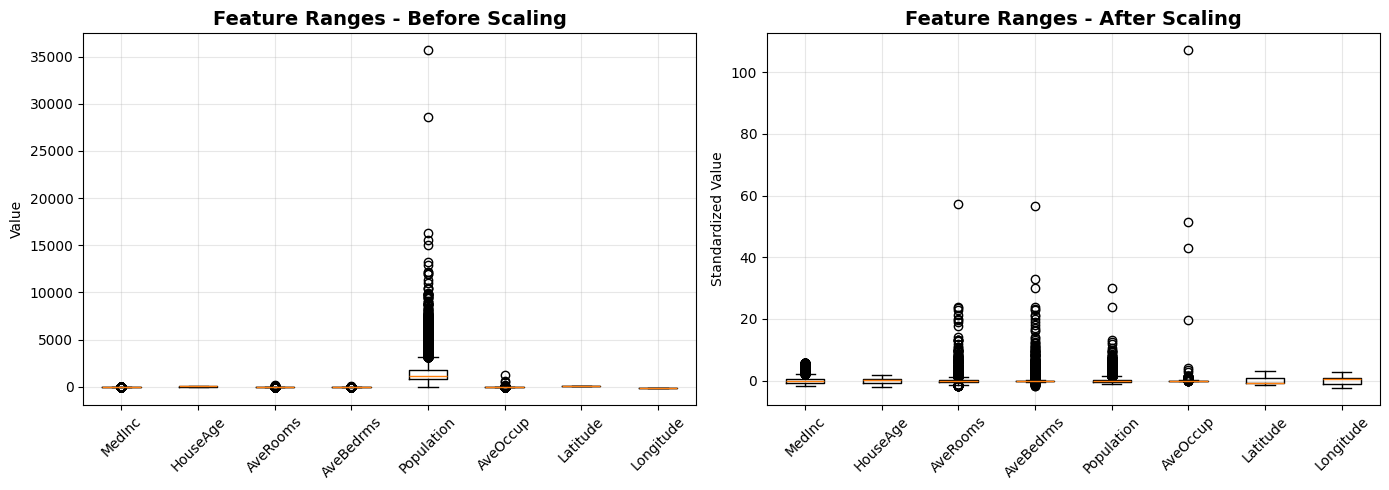

In [28]:
# Visualization: Before vs After
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].boxplot(X_train.values, labels=X_train.columns)
axes[0].set_title('Feature Ranges - Before Scaling', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# After scaling
axes[1].boxplot(X_train_scaled, labels=X_train.columns)
axes[1].set_title('Feature Ranges - After Scaling', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standardized Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🛠️ Feature Engineering (The Real Skill That Differentiates the Practitioner)

Creating new features based on domain knowledge:

1. **Rooms per Bedroom** → house spaciousness  
2. **Population Density** → people per household  
3. **Bedroom Ratio** → bedrooms as a fraction of rooms

In [29]:
def add_engineered_features(X):
    """Add domain-specific features"""
    X = X.copy()
    
    # Rooms per bedroom (avoid division by zero)
    X['RoomsPerBedroom'] = X['AveRooms'] / (X['AveBedrms'] + 1e-6)
    
    # Population density
    X['PopulationDensity'] = X['Population'] / (X['AveOccup'] + 1e-6)
    
    # Bedroom ratio
    X['BedroomRatio'] = X['AveBedrms'] / (X['AveRooms'] + 1e-6)
    
    return X

# Add features
X_train_eng = add_engineered_features(X_train)
X_test_eng = add_engineered_features(X_test)

print("=" * 70)
print("🛠️ FEATURE ENGINEERING APPLIED")
print("=" * 70)
print(f"Original features: {X_train.shape[1]}")
print(f"After engineering: {X_train_eng.shape[1]}")
print(f"\nNew features: {list(X_train_eng.columns[-3:])}")

# Scale the engineered features
X_train_eng_scaled = scaler.fit_transform(X_train_eng)
X_test_eng_scaled = scaler.transform(X_test_eng)

🛠️ FEATURE ENGINEERING APPLIED
Original features: 8
After engineering: 11

New features: ['RoomsPerBedroom', 'PopulationDensity', 'BedroomRatio']


## Ok after the feature engineering lets see the new features and their relationship with the target variable

In [30]:
# Combine features and target for correlation analysis
import pandas as pd

# Merge engineered training features with target
df_train_eng = X_train_eng.copy()
df_train_eng['Price'] = y_train.values

# Compute correlations with target
corr_matrix = df_train_eng.corr()
corr_with_price = corr_matrix['Price'].sort_values(ascending=False)

print("=" * 70)
print("📊 FEATURE CORRELATION WITH PRICE")
print("=" * 70)
print(corr_with_price)


📊 FEATURE CORRELATION WITH PRICE
Price                1.000000
MedInc               0.690647
RoomsPerBedroom      0.385048
AveRooms             0.158485
HouseAge             0.103706
PopulationDensity    0.063714
AveOccup            -0.022030
Population          -0.026032
Longitude           -0.046349
AveBedrms           -0.051351
Latitude            -0.142983
BedroomRatio        -0.257419
Name: Price, dtype: float64


## 🛠️ Imporatant : Feature Engineering — ML vs Deep Learning

### 1️⃣ Traditional Machine Learning
- **Idea:** The model relies on **hand-crafted features** to extract signal from data.  
- **Goal:** Transform raw data into **informative features** that improve model performance.  
- **Example:**  
  - Rooms per Bedroom → house spaciousness  
  - Population Density → people per household  
  - Bedroom Ratio → fraction of bedrooms  
- **Impact:** Feature quality often **determines model success**. Poor features → poor model.

---

### 2️⃣ Deep Learning
- **Idea:** The model **learns features automatically** from raw data.  
- **Goal:** Let the network discover the **most relevant representations** internally.  
- **Example:**  
  - Image CNNs automatically detect edges, shapes, textures  
  - Language models learn semantic embeddings from raw text  
- **Impact:** Reduces need for manual feature design but may require **more data and computation**.

---

### 💡 Key Insight
- In ML, **feature engineering is critical** and often domain-specific.  
- In DL, **feature engineering is implicit**, handled by the network’s layers.  
- Hybrid approach: Sometimes we combine engineered features with DL embeddings for **best performance**.


## After all of that now we arrive at the model part
# Part 4️⃣: Model Training & Comparison

We'll train multiple regression models and compare:

1. **Linear Regression** (baseline)
2. **Ridge Regression** (L2 regularization)
3. **Lasso Regression** (L1 regularization)
4. **Polynomial Regression** (non-linear features)

## 📐 Model 1: Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Train linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Metrics
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

print("=" * 70)
print("📐 LINEAR REGRESSION RESULTS")
print("=" * 70)
print(f"Training MSE:  {mse_lr_train:.4f}")
print(f"Testing MSE:   {mse_lr_test:.4f}")
print(f"Training R²:   {r2_lr_train:.4f}")
print(f"Testing R²:    {r2_lr_test:.4f}")

📐 LINEAR REGRESSION RESULTS
Training MSE:  0.5179
Testing MSE:   0.5559
Training R²:   0.6126
Testing R²:    0.5758


## 🎯 Model 2: Ridge Regression (L2 Regularization)

**Ridge** adds a penalty to large weights: $Loss = MSE + \alpha \sum w_i^2$

This prevents overfitting by keeping weights small.

In [32]:
# Train Ridge with different alpha values
alphas = [0.01, 0.1, 1.0, 10.0]
ridge_results = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    y_pred_test = ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    ridge_results[alpha] = {'mse': mse, 'r2': r2, 'model': ridge}

# Best Ridge model
best_alpha = min(ridge_results, key=lambda x: ridge_results[x]['mse'])
ridge_model = ridge_results[best_alpha]['model']

print("=" * 70)
print("🎯 RIDGE REGRESSION RESULTS")
print("=" * 70)
for alpha, results in ridge_results.items():
    print(f"Alpha={alpha:<6} → MSE={results['mse']:.4f}, R²={results['r2']:.4f}")
print(f"\n✅ Best Alpha: {best_alpha}")

🎯 RIDGE REGRESSION RESULTS
Alpha=0.01   → MSE=0.5559, R²=0.5758
Alpha=0.1    → MSE=0.5559, R²=0.5758
Alpha=1.0    → MSE=0.5559, R²=0.5758
Alpha=10.0   → MSE=0.5555, R²=0.5761

✅ Best Alpha: 10.0


## 🎯 Model 3: Lasso Regression (L1 Regularization)

**Lasso** can shrink some weights to **exactly zero**: $Loss = MSE + \alpha \sum |w_i|$

This performs **feature selection** automatically!

In [33]:
# Train Lasso
lasso_results = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    
    y_pred_test = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    # Count non-zero weights
    n_features_used = np.sum(lasso.coef_ != 0)
    
    lasso_results[alpha] = {
        'mse': mse, 
        'r2': r2, 
        'model': lasso,
        'features_used': n_features_used
    }

print("=" * 70)
print("🎯 LASSO REGRESSION RESULTS")
print("=" * 70)
for alpha, results in lasso_results.items():
    print(f"Alpha={alpha:<6} → MSE={results['mse']:.4f}, R²={results['r2']:.4f}, Features={results['features_used']}")

🎯 LASSO REGRESSION RESULTS
Alpha=0.01   → MSE=0.5483, R²=0.5816, Features=7
Alpha=0.1    → MSE=0.6796, R²=0.4814, Features=3
Alpha=1.0    → MSE=1.3107, R²=-0.0002, Features=0
Alpha=10.0   → MSE=1.3107, R²=-0.0002, Features=0


## 🌀 Model 4: Polynomial Regression

Linear models can't capture **non-linear relationships**.

Solution: Create polynomial features! $[x_1, x_2] \rightarrow [x_1, x_2, x_1^2, x_1x_2, x_2^2]$

In [34]:
# Polynomial degree 2
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)

y_pred_poly_train = poly_pipeline.predict(X_train)
y_pred_poly_test = poly_pipeline.predict(X_test)

mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
r2_poly_train = r2_score(y_train, y_pred_poly_train)
r2_poly_test = r2_score(y_test, y_pred_poly_test)

print("=" * 70)
print("🌀 POLYNOMIAL REGRESSION RESULTS (degree=2)")
print("=" * 70)
print(f"Training MSE:  {mse_poly_train:.4f}")
print(f"Testing MSE:   {mse_poly_test:.4f}")
print(f"Training R²:   {r2_poly_train:.4f}")
print(f"Testing R²:    {r2_poly_test:.4f}")

🌀 POLYNOMIAL REGRESSION RESULTS (degree=2)
Training MSE:  0.4207
Testing MSE:   0.4643
Training R²:   0.6853
Testing R²:    0.6457


## 📊 Model Comparison Dashboard

In [35]:
# Compile results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge (best)', 'Lasso (best)', 'Polynomial (deg=2)'],
    'Training MSE': [mse_lr_train, 
                     mean_squared_error(y_train, ridge_model.predict(X_train_scaled)),
                     mean_squared_error(y_train, lasso_results[0.01]['model'].predict(X_train_scaled)),
                     mse_poly_train],
    'Testing MSE': [mse_lr_test, 
                    ridge_results[best_alpha]['mse'],
                    lasso_results[0.01]['mse'],
                    mse_poly_test],
    'Testing R²': [r2_lr_test,
                   ridge_results[best_alpha]['r2'],
                   lasso_results[0.01]['r2'],
                   r2_poly_test]
})

print("\n" + "=" * 90)
print("🏆 FINAL MODEL COMPARISON")
print("=" * 90)
print(results_df.to_string(index=False))
print("=" * 90)


🏆 FINAL MODEL COMPARISON
             Model  Training MSE  Testing MSE  Testing R²
 Linear Regression      0.517933     0.555892    0.575788
      Ridge (best)      0.517942     0.555535    0.576060
      Lasso (best)      0.523384     0.548255    0.581615
Polynomial (deg=2)      0.420727     0.464302    0.645682


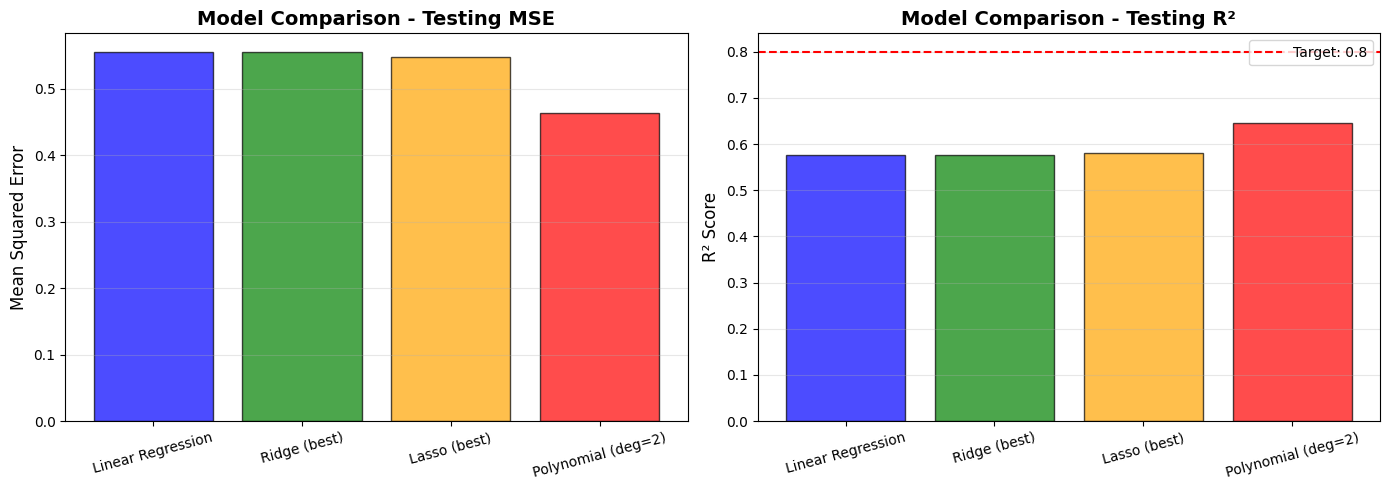

In [36]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart - MSE comparison
models = results_df['Model']
test_mse = results_df['Testing MSE']

axes[0].bar(models, test_mse, color=['blue', 'green', 'orange', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Mean Squared Error', fontsize=12)
axes[0].set_title('Model Comparison - Testing MSE', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3, axis='y')

# Bar chart - R² comparison
test_r2 = results_df['Testing R²']

axes[1].bar(models, test_r2, color=['blue', 'green', 'orange', 'red'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_title('Model Comparison - Testing R²', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].axhline(y=0.8, color='red', linestyle='--', label='Target: 0.8')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---
# Part 5️⃣: Model Evaluation & Diagnostics

Let's perform **deep evaluation** of our best model (Polynomial Regression).

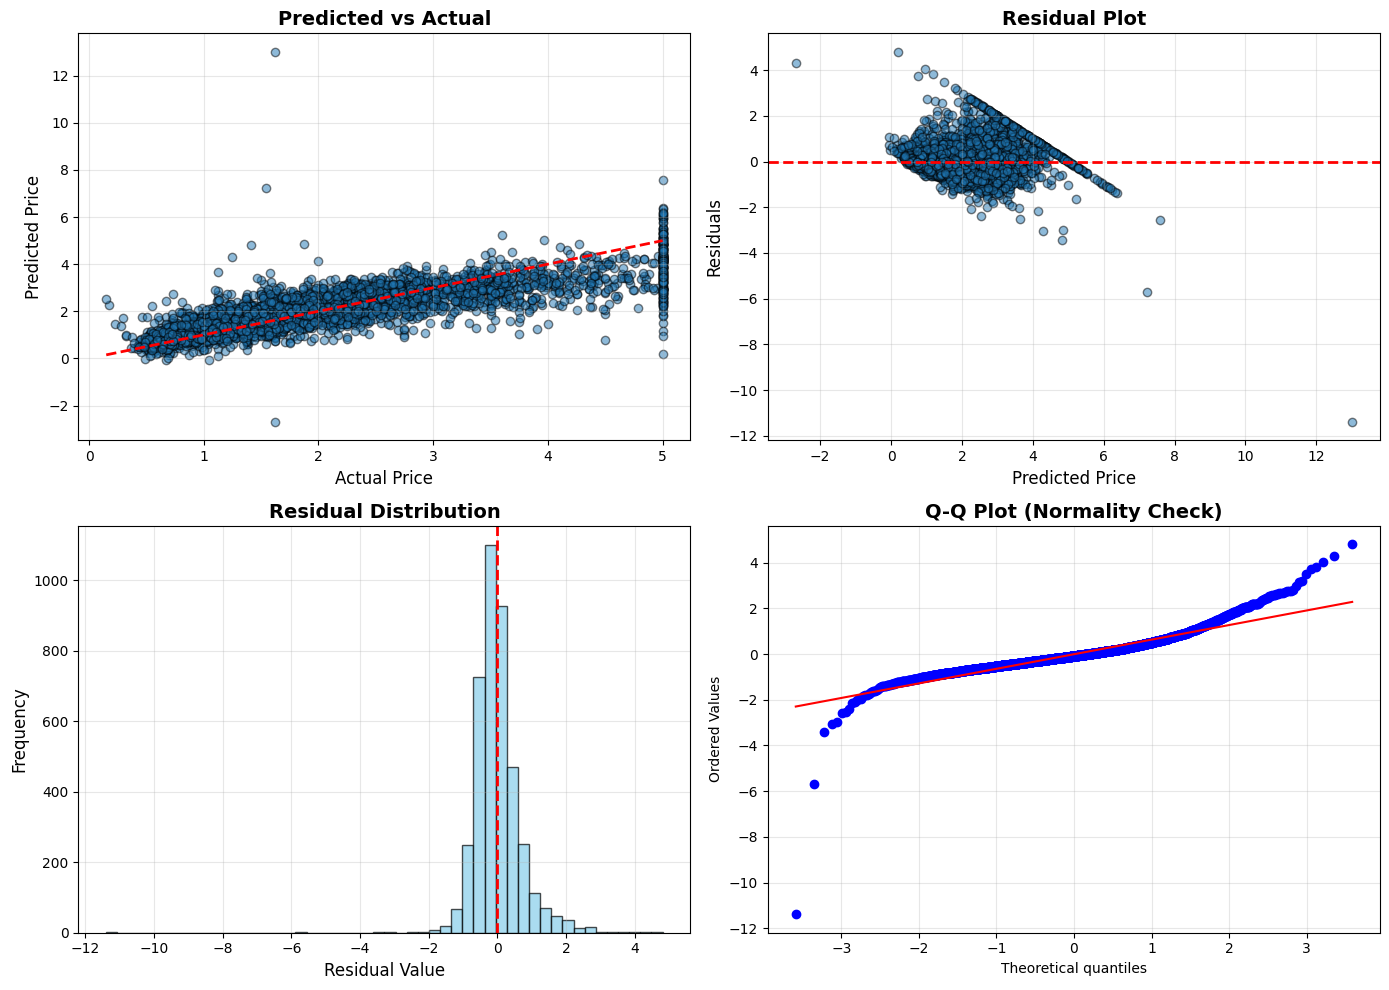

In [37]:
# Residual analysis
residuals = y_test - y_pred_poly_test

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Predicted vs Actual
axes[0, 0].scatter(y_test, y_pred_poly_test, alpha=0.5, edgecolors='k')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price', fontsize=12)
axes[0, 0].set_title('Predicted vs Actual', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual plot
axes[0, 1].scatter(y_pred_poly_test, residuals, alpha=0.5, edgecolors='k')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual distribution
axes[1, 0].hist(residuals, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residual Value', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot for normality
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
# Statistical tests
print("\n" + "=" * 70)
print("📊 RESIDUAL ANALYSIS")
print("=" * 70)
print(f"Mean of residuals:    {np.mean(residuals):.6f}  (should be ≈ 0)")
print(f"Std of residuals:     {np.std(residuals):.4f}")
print(f"Min residual:         {np.min(residuals):.4f}")
print(f"Max residual:         {np.max(residuals):.4f}")

# Normality test
_, p_value = stats.shapiro(residuals[:5000])  # Shapiro-Wilk test (sample for speed)
print(f"\nShapiro-Wilk p-value: {p_value:.4f}")
if p_value > 0.05:
    print("✅ Residuals appear normally distributed")
else:
    print("⚠️ Residuals may not be perfectly normal")


📊 RESIDUAL ANALYSIS
Mean of residuals:    -0.003468  (should be ≈ 0)
Std of residuals:     0.6814
Min residual:         -11.3887
Max residual:         4.8083

Shapiro-Wilk p-value: 0.0000
⚠️ Residuals may not be perfectly normal


## 🎯 Feature Importance Analysis

Which features matter most? Let's examine coefficients from our linear model.

In [39]:
# Get feature importance from linear regression
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("=" * 70)
print("🎯 FEATURE IMPORTANCE (Linear Regression Coefficients)")
print("=" * 70)
print(feature_importance.to_string(index=False))

🎯 FEATURE IMPORTANCE (Linear Regression Coefficients)
   Feature  Coefficient  Abs_Coefficient
  Latitude    -0.896929         0.896929
 Longitude    -0.869842         0.869842
    MedInc     0.854383         0.854383
 AveBedrms     0.339259         0.339259
  AveRooms    -0.294410         0.294410
  HouseAge     0.122546         0.122546
  AveOccup    -0.040829         0.040829
Population    -0.002308         0.002308


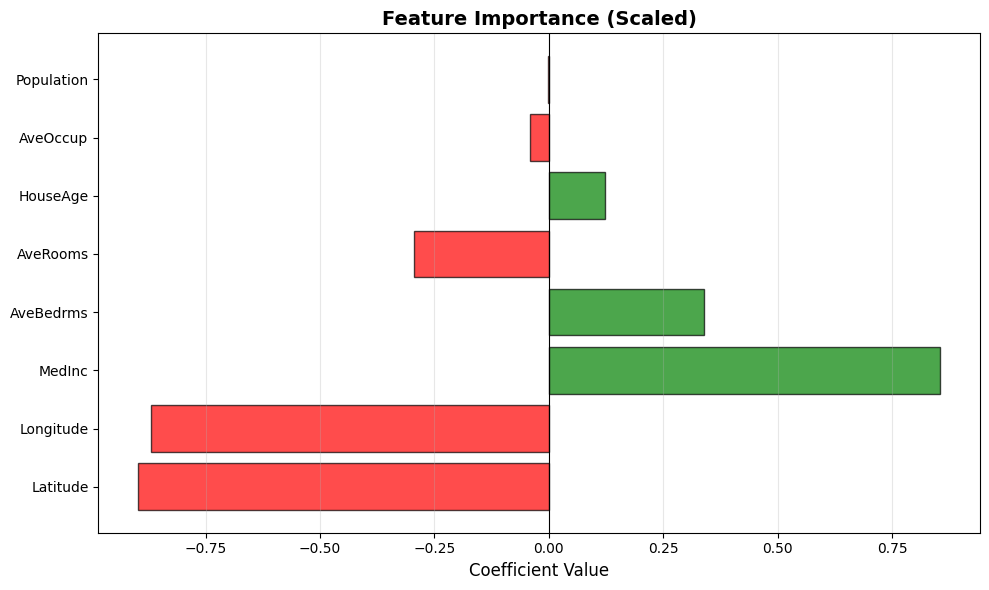

In [40]:
# Visualization
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], 
         color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Importance (Scaled)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 🔍 Error Analysis: Where Does the Model Fail?

In [41]:
# Find worst predictions
error_analysis = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_poly_test,
    'Residual': residuals,
    'Abs_Error': np.abs(residuals)
})

# Top 10 worst predictions
worst_predictions = error_analysis.nlargest(10, 'Abs_Error')

print("=" * 70)
print("🔍 TOP 10 WORST PREDICTIONS")
print("=" * 70)
print(worst_predictions.to_string(index=False))

🔍 TOP 10 WORST PREDICTIONS
 Actual  Predicted   Residual  Abs_Error
1.62500  13.013670 -11.388670  11.388670
1.54600   7.233284  -5.687284   5.687284
5.00001   0.191732   4.808278   4.808278
1.62500  -2.688279   4.313279   4.313279
5.00001   0.947756   4.052254   4.052254
5.00001   1.179757   3.820253   3.820253
4.50000   0.767018   3.732982   3.732982
5.00001   1.504005   3.496005   3.496005
1.41300   4.825138  -3.412138   3.412138
5.00001   1.795774   3.204236   3.204236


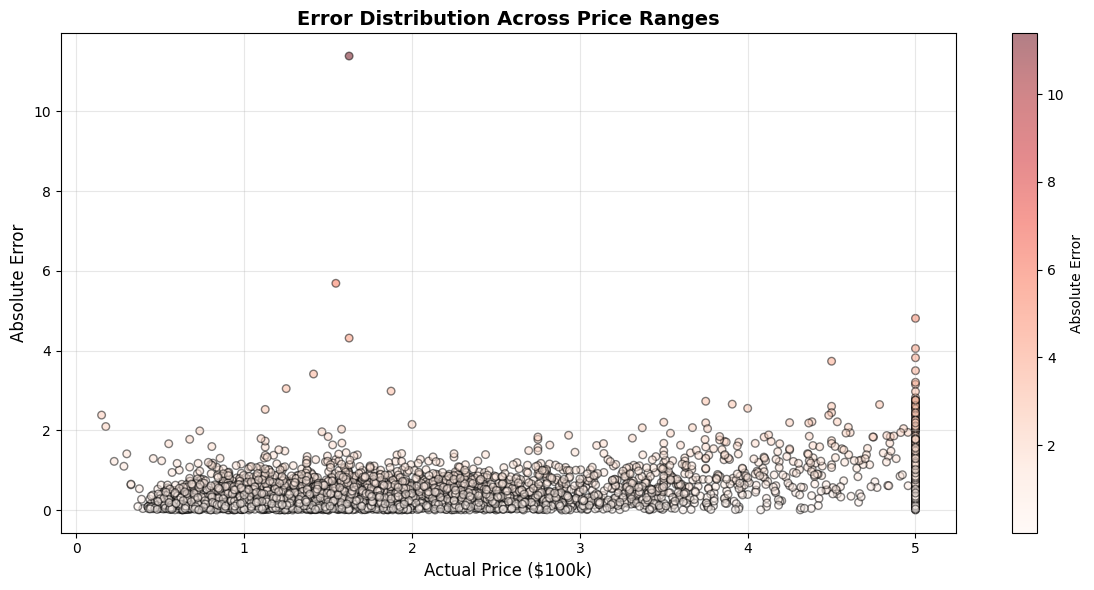

In [42]:
# Visualize error distribution by price range
plt.figure(figsize=(12, 6))
plt.scatter(y_test, np.abs(residuals), alpha=0.5, c=np.abs(residuals), 
            cmap='Reds', edgecolors='k', s=30)
plt.colorbar(label='Absolute Error')
plt.xlabel('Actual Price ($100k)', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Error Distribution Across Price Ranges', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
# Part 6️⃣: Building a Simple Prediction Interface

Let's create an **interactive tool** where users can input house features and get price predictions!

## 🎨 Simple Command-Line Interface

In [43]:
import gradio as gr
import numpy as np

# -------------------------------
# Function to predict house price
# -------------------------------
def predict_house_price(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    features = {
        'MedInc': MedInc,
        'HouseAge': HouseAge,
        'AveRooms': AveRooms,
        'AveBedrms': AveBedrms,
        'Population': Population,
        'AveOccup': AveOccup,
        'Latitude': Latitude,
        'Longitude': Longitude
    }
    # Use your existing predictor instance (poly_pipeline)
    price_k = predictor.predict_price(features) * 100  # Convert to $k
    return f"${price_k:.2f}k"

# -------------------------------
# Predefined sample houses
# -------------------------------
sample_houses = {
    "Expensive Coastal House": {
        'MedInc': 8.5, 'HouseAge': 15, 'AveRooms': 7.5, 'AveBedrms': 1.2,
        'Population': 500, 'AveOccup': 2.5, 'Latitude': 37.8, 'Longitude': -122.4
    },
    "Affordable Inland House": {
        'MedInc': 3.0, 'HouseAge': 35, 'AveRooms': 4.5, 'AveBedrms': 1.0,
        'Population': 1500, 'AveOccup': 3.5, 'Latitude': 34.0, 'Longitude': -118.0
    },
    "Average House": {
        'MedInc': 4.5, 'HouseAge': 25, 'AveRooms': 5.5, 'AveBedrms': 1.0,
        'Population': 1000, 'AveOccup': 3.0, 'Latitude': 36.0, 'Longitude': -119.0
    }
}

# -------------------------------
# Gradio interface
# -------------------------------
iface = gr.Interface(
    fn=predict_house_price,
    inputs=[
        gr.Slider(0.0, 15.0, value=4.5, step=0.1, label="Median Income (MedInc)"),
        gr.Slider(1, 60, value=25, step=1, label="House Age (HouseAge)"),
        gr.Slider(1.0, 15.0, value=5.5, step=0.1, label="Average Rooms (AveRooms)"),
        gr.Slider(0.1, 5.0, value=1.0, step=0.1, label="Average Bedrooms (AveBedrms)"),
        gr.Slider(50, 5000, value=1000, step=10, label="Population"),
        gr.Slider(1.0, 10.0, value=3.0, step=0.1, label="Average Occupancy (AveOccup)"),
        gr.Slider(32.0, 42.0, value=36.0, step=0.01, label="Latitude"),
        gr.Slider(-125.0, -114.0, value=-120.0, step=0.01, label="Longitude")
    ],
    outputs=gr.Textbox(label="Predicted Price ($k)"),
    title="🏠 California House Price Predictor",
    description="Adjust the sliders to predict the price of a house in California based on features."
)

# -------------------------------
# Launch the Gradio app
# -------------------------------
iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://1b4fd2180383229f2d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Saving and Loading the Model

In [44]:
import joblib
import json

# Save the model
model_artifacts = {
    'model': poly_pipeline,
    'scaler': scaler,
    'feature_names': list(X_train.columns),
    'metrics': {
        'test_mse': float(mse_poly_test),
        'test_r2': float(r2_poly_test)
    }
}

# Save with joblib
joblib.dump(model_artifacts, 'california_housing_model.pkl')
print("✅ Model saved successfully to 'california_housing_model.pkl'")

# Load the model (demonstration)
loaded_artifacts = joblib.load('california_housing_model.pkl')
loaded_model = loaded_artifacts['model']
loaded_scaler = loaded_artifacts['scaler']

# Test loaded model
test_prediction = loaded_model.predict(X_test.iloc[:1])
print(f"\n✅ Loaded model test prediction: ${test_prediction[0] * 100:.2f}k")
print(f"   Original prediction: ${y_pred_poly_test[0] * 100:.2f}k")
print(f"   Match: {np.isclose(test_prediction[0], y_pred_poly_test[0])}")

✅ Model saved successfully to 'california_housing_model.pkl'

✅ Loaded model test prediction: $55.40k
   Original prediction: $55.40k
   Match: True


# 🎓 Key Takeaways & Best Practices

## **What We Learned**

### 1️⃣ Model Development Lifecycle

```
Raw Data → EDA → Preprocessing → Feature Engineering → 
Model Training → Evaluation → Deployment
```

> Understanding the full lifecycle ensures you build robust, production-ready models rather than just “good-looking” experiments.

---

### 2️⃣ Critical Skills

* ✅ **Data Exploration & Visualization** — Detect patterns, outliers, and relationships.
* ✅ **Feature Engineering & Scaling** — Transform raw data into meaningful signals for your model.
* ✅ **Model Training & Tuning** — Try multiple algorithms and hyperparameters to find the best fit.
* ✅ **Model Evaluation & Comparison** — Use metrics and diagnostics to select the most reliable model.
* ✅ **Error Analysis & Diagnostics** — Identify weak spots, biases, or data issues.
* ✅ **Production Readiness** — Build interfaces, validate inputs, and ensure reproducibility.

---

### 3️⃣ Best Practices

| **Practice**                      | **Why It Matters**                                         |
| --------------------------------- | ---------------------------------------------------------- |
| **Train-Test Split**              | Measures generalization, avoids overfitting.               |
| **Feature Scaling**               | Ensures faster convergence and fair treatment of features. |
| **Cross-Validation**              | Provides more robust performance estimates.                |
| **Regularization (Ridge, Lasso)** | Prevents overfitting in complex models.                    |
| **Error Analysis**                | Pinpoints model weaknesses and guides improvement.         |
| **Input Validation**              | Protects production pipelines from bad or missing data.    |

> 💡 **Pro Tip:** Document every step so your workflow can be audited, reproduced, and improved.

---

### 4️⃣ Model Selection Guidelines

| **Model**                 | **When to Use**                                      |
| ------------------------- | ---------------------------------------------------- |
| **Linear Regression**     | Fast, interpretable baseline for continuous targets. |
| **Ridge Regression**      | Handles correlated features (multicollinearity).     |
| **Lasso Regression**      | Automatically selects the most important features.   |
| **Polynomial Regression** | Captures non-linear relationships in data.           |

> ⚡ Start simple, then increase complexity only when necessary. Over-complicating early leads to overfitting and maintenance headaches.

---

### 5️⃣ Common Pitfalls to Avoid

* ⚠️ **Data Leakage**: Scaling or transforming before splitting inflates performance.
* ⚠️ **Overfitting**: High training R² but low testing R² signals poor generalization.
* ⚠️ **Ignoring Outliers**: Can skew models and lead to unreliable predictions.
* ⚠️ **Not Validating Inputs**: Can crash production systems or produce wrong predictions.
* ⚠️ **Ignoring Domain Knowledge**: Features should reflect real-world understanding and intuition.

> 📝 **Rule of Thumb:** Always question whether your features, transformations, and predictions make sense in context.


## 🏋️ Exercises

1. **Project Replication Challenge***(you can use my own code as reference)*

   * Choose a **different dataset** of your interest.
   * Try to **replicate the workflow** from the notebook: preprocessing, feature engineering, training models, evaluating performance, and making predictions.
   * Document your process, challenges, and insights.
   * Share your results as demo in the group (gradio or any UI package).

2. **Use these External Reading**(i will provide the material)

   * Read about the **Universal Workflow of an ML Project** from the book *Python Deep Learning* (you will provide the material).
   * Explore a notebook from *Hands-On Machine Learning with Scikit-Learn and TensorFlow* (Chapter 2) that demonstrates practical ML workflows.
   * Analyze how data is prepared, models are trained, and predictions are evaluated. (same dataset or but more complex workflow and models)

# 🎉 Congratulations!

You've successfully completed a **comprehensive, end-to-end machine learning project**!

Throughout this journey, you’ve gained hands-on experience in:

* ✅ **Data Exploration & Visualization** – uncover patterns, spot anomalies, and tell the story behind the data
* ✅ **Feature Engineering** – transform raw data into meaningful insights that boost model performance
* ✅ **Regression Algorithms** – train and compare multiple models to understand their strengths and weaknesses
* ✅ **Model Evaluation & Comparison** – validate your models and make informed choices
* ✅ **Production-Ready Deployment** – turn your ML solution into a usable, reliable system

**But remember — this is just the beginning!** 🚀

Machine learning is an **ever-evolving field**, and the real mastery comes from **continuous experimentation, exploration, and iteration**. Keep asking questions, trying new datasets, and pushing the boundaries of what you can build.

**Your journey has only begun — the world of ML is yours to explore!**
